In [1]:
from fastai.vision import *
from fastai.metrics import error_rate

path = Path('/Users/timothykashi/Desktop/UNR_Buildings')

In [2]:
dest = path/'Fitness Center'    
dest.mkdir(parents = True, exist_ok = True)
dest = path/'Joe Crowley Student Union'
dest.mkdir(parents = True, exist_ok = True)
dest = path/'Knowledge Center'
dest.mkdir(parents = True, exist_ok = True)
dest = path/'Pennington'
dest.mkdir(parents = True, exist_ok = True)

classes = ['Fitness Center',
           'Joe Crowley Student Union',
           'Knowledge Center',
           'Pennington']

In [3]:
for c in classes:
  print(c)
  verify_images(path/c, delete = True, max_size = 500)

Fitness Center


Joe Crowley Student Union


Knowledge Center


Pennington


In [4]:
data = ImageDataBunch.from_folder(path, train='.', valid_pct = 0.2,
                                  ds_tfms = get_transforms(), size = 224, num_workers=2).normalize(imagenet_stats)

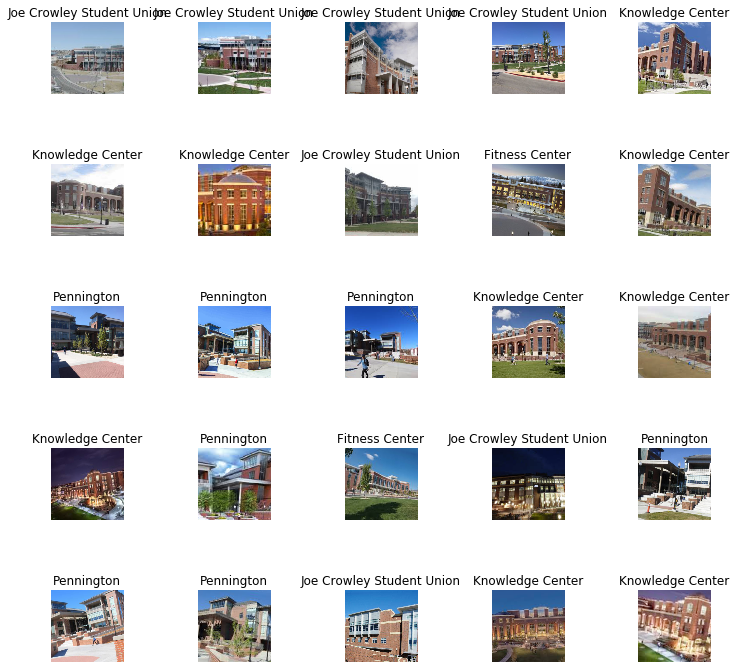

In [5]:
data.show_batch(rows = 5, figsize = (10,10))

In [6]:
print(data.classes)
print(len(data.train_ds))
print(len(data.valid_ds))

['Fitness Center', 'Joe Crowley Student Union', 'Knowledge Center', 'Pennington']
110
27


In [7]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

In [9]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.391378,0.593575,0.222222,00:25
1,0.436936,0.440230,0.111111,00:25
2,0.373143,0.366792,0.111111,00:24
3,0.351247,0.316276,0.111111,00:25
4,0.334392,0.280044,0.111111,00:25


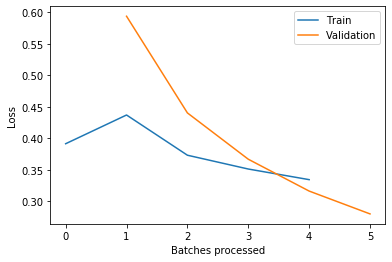

In [10]:
learn.recorder.plot_losses()

In [11]:
interp = ClassificationInterpretation.from_learner(learn)

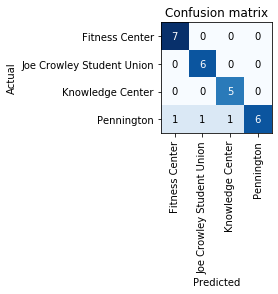

In [12]:
interp.plot_confusion_matrix()

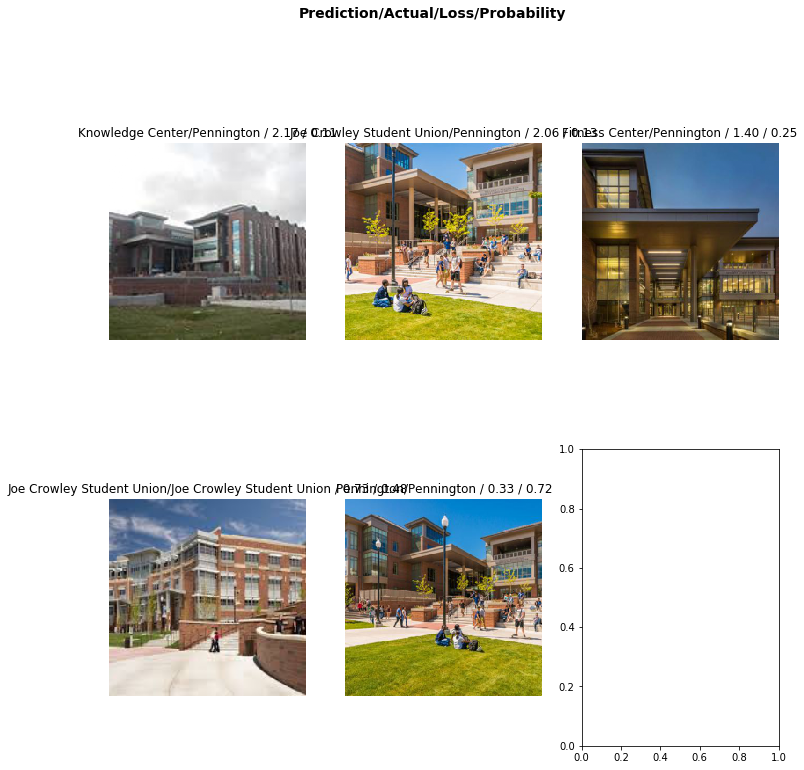

In [13]:
interp.plot_top_losses(k = 5, heatmap=False)

In [14]:
os.chdir(path)

In [15]:
os.getcwd()

'/Users/timothykashi/Desktop/UNR_Buildings'

In [16]:
learn.export()